In [1]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
#Load your dataset
file_path = "../csvs/shuffled_data.csv"
data = pd.read_csv(file_path)

#Drop the last column
X = data.drop(columns=["target"])


In [3]:
#normalize the data
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [4]:
#calculate the nearest neighbors to determine epsilon
MinPts = 2 * X.shape[1]

#determine optimal epsilon value through KNN
neighbors = NearestNeighbors(n_neighbors=MinPts)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

Text(0, 0.5, '24th nearest distances')

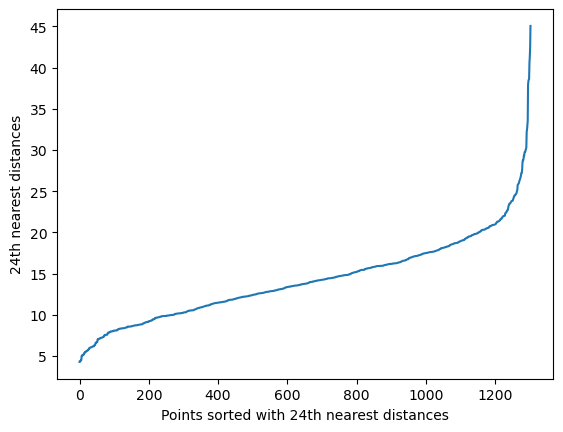

In [5]:
#sort distance values to determine best epsilon value
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

#make sure to label the x and y-axis
plt.xlabel("Points sorted with 24th nearest distances")
plt.ylabel("24th nearest distances")

In [6]:
#set the optimal value for epsilon
e = 21

#perform DBSCAN
db = DBSCAN(eps=e, min_samples=MinPts)
cl = db.fit_predict(X)

#append the results to the original dataframe
data['target'] = cl

In [7]:
#evaluate the silhouette coefficient
from sklearn import metrics
metrics.silhouette_score(data, data['target'])

-0.09811052427487588